In [18]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the dataset
data = pd.read_csv('data\\dataset1.csv')

# Display the first few rows of the dataset
print(data.head())

# Prepare features and target variable
X = data.drop('Fertility', axis=1)  # Features
y = data['Fertility']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Data loaded and split successfully!")



     N    P    K    pH    EC    OC     S    Zn    Fe    Cu    Mn     B  \
0  138  8.6  560  7.46  0.62  0.70   5.9  0.24  0.31  0.77  8.71  0.11   
1  213  7.5  338  7.62  0.75  1.06  25.4  0.30  0.86  1.54  2.89  2.29   
2  163  9.6  718  7.59  0.51  1.11  14.3  0.30  0.86  1.57  2.70  2.03   
3  157  6.8  475  7.64  0.58  0.94  26.0  0.34  0.54  1.53  2.65  1.82   
4  270  9.9  444  7.63  0.40  0.86  11.8  0.25  0.76  1.69  2.43  2.26   

   Fertility  
0          0  
1          0  
2          0  
3          0  
4          1  
Data loaded and split successfully!


In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize the Random Forest Classifier with class weights to handle imbalance
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%")

# Print classification report with zero_division set to avoid warnings
print("\nClassification Report:\n", classification_report(y_test, y_pred, zero_division=1))


Model Accuracy: 99.08%

Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       157
           1       1.00      0.98      0.99       179
           2       1.00      1.00      1.00        98

    accuracy                           0.99       434
   macro avg       0.99      0.99      0.99       434
weighted avg       0.99      0.99      0.99       434



In [20]:
import shap
import matplotlib.pyplot as plt

# Create an explainer object for the Random Forest model
explainer = shap.TreeExplainer(rf_model)

# Calculate SHAP values for the test data
shap_values = explainer.shap_values(X_test)

# Loop through each class to plot SHAP summary plots
for class_idx in range(len(shap_values)):
    print(f"SHAP summary plot for class {class_idx}")
    
    # Use the detailed SHAP summary plot for each class
    # Ensure that the shape of shap_values and X_test match
    if shap_values[class_idx].shape[0] == X_test.shape[0]:
        shap.summary_plot(shap_values[class_idx], X_test)
    else:
        print(f"Shape mismatch for class {class_idx}: SHAP values shape {shap_values[class_idx].shape} vs. X_test shape {X_test.shape}")


SHAP summary plot for class 0
Shape mismatch for class 0: SHAP values shape (12, 3) vs. X_test shape (434, 12)
SHAP summary plot for class 1
Shape mismatch for class 1: SHAP values shape (12, 3) vs. X_test shape (434, 12)
SHAP summary plot for class 2
Shape mismatch for class 2: SHAP values shape (12, 3) vs. X_test shape (434, 12)
SHAP summary plot for class 3
Shape mismatch for class 3: SHAP values shape (12, 3) vs. X_test shape (434, 12)
SHAP summary plot for class 4
Shape mismatch for class 4: SHAP values shape (12, 3) vs. X_test shape (434, 12)
SHAP summary plot for class 5
Shape mismatch for class 5: SHAP values shape (12, 3) vs. X_test shape (434, 12)
SHAP summary plot for class 6
Shape mismatch for class 6: SHAP values shape (12, 3) vs. X_test shape (434, 12)
SHAP summary plot for class 7
Shape mismatch for class 7: SHAP values shape (12, 3) vs. X_test shape (434, 12)
SHAP summary plot for class 8
Shape mismatch for class 8: SHAP values shape (12, 3) vs. X_test shape (434, 12)
S

In [21]:
# Print shapes for verification
print(f"Shape of X_test: {X_test.shape}")
print(f"Number of classes: {len(shap_values)}")

for class_idx in range(len(shap_values)):
    print(f"Shape of SHAP values for class {class_idx}: {shap_values[class_idx].shape}")


Shape of X_test: (434, 12)
Number of classes: 434
Shape of SHAP values for class 0: (12, 3)
Shape of SHAP values for class 1: (12, 3)
Shape of SHAP values for class 2: (12, 3)
Shape of SHAP values for class 3: (12, 3)
Shape of SHAP values for class 4: (12, 3)
Shape of SHAP values for class 5: (12, 3)
Shape of SHAP values for class 6: (12, 3)
Shape of SHAP values for class 7: (12, 3)
Shape of SHAP values for class 8: (12, 3)
Shape of SHAP values for class 9: (12, 3)
Shape of SHAP values for class 10: (12, 3)
Shape of SHAP values for class 11: (12, 3)
Shape of SHAP values for class 12: (12, 3)
Shape of SHAP values for class 13: (12, 3)
Shape of SHAP values for class 14: (12, 3)
Shape of SHAP values for class 15: (12, 3)
Shape of SHAP values for class 16: (12, 3)
Shape of SHAP values for class 17: (12, 3)
Shape of SHAP values for class 18: (12, 3)
Shape of SHAP values for class 19: (12, 3)
Shape of SHAP values for class 20: (12, 3)
Shape of SHAP values for class 21: (12, 3)
Shape of SHAP 

In [22]:
import shap
import matplotlib.pyplot as plt

# Create an explainer object for the Random Forest model
explainer = shap.TreeExplainer(rf_model)

# Calculate SHAP values for the test data
shap_values = explainer.shap_values(X_test)

# Print shapes for verification
print(f"Shape of X_test: {X_test.shape}")
print(f"Number of classes: {len(shap_values)}")

# Ensure dimensions match
num_features = X_test.shape[1]
for idx in range(len(shap_values)):
    print(f"Shape of SHAP values for class {idx}: {shap_values[idx].shape}")
    if shap_values[idx].shape[1] != num_features:
        # Adjust SHAP values to match the number of features
        shap_values[idx] = shap_values[idx][:, :num_features]

# Ensure feature names are correct
feature_names = X_test.columns.tolist()

# Select a sample index and class index
sample_idx = 0  # Change the index to any other sample you want to visualize
class_idx = 0   # Change this to the class you want to visualize

# Create a force plot for the given sample and class
try:
    shap.force_plot(
        explainer.expected_value[class_idx],
        shap_values[class_idx][sample_idx],
        X_test.iloc[sample_idx],
        feature_names=feature_names,
        matplotlib=True
    )
    plt.show()
except Exception as e:
    print(f"An error occurred: {e}")


Shape of X_test: (434, 12)
Number of classes: 434
Shape of SHAP values for class 0: (12, 3)
Shape of SHAP values for class 1: (12, 3)
Shape of SHAP values for class 2: (12, 3)
Shape of SHAP values for class 3: (12, 3)
Shape of SHAP values for class 4: (12, 3)
Shape of SHAP values for class 5: (12, 3)
Shape of SHAP values for class 6: (12, 3)
Shape of SHAP values for class 7: (12, 3)
Shape of SHAP values for class 8: (12, 3)
Shape of SHAP values for class 9: (12, 3)
Shape of SHAP values for class 10: (12, 3)
Shape of SHAP values for class 11: (12, 3)
Shape of SHAP values for class 12: (12, 3)
Shape of SHAP values for class 13: (12, 3)
Shape of SHAP values for class 14: (12, 3)
Shape of SHAP values for class 15: (12, 3)
Shape of SHAP values for class 16: (12, 3)
Shape of SHAP values for class 17: (12, 3)
Shape of SHAP values for class 18: (12, 3)
Shape of SHAP values for class 19: (12, 3)
Shape of SHAP values for class 20: (12, 3)
Shape of SHAP values for class 21: (12, 3)
Shape of SHAP 

In [23]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 150, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Fit GridSearchCV to the data
grid_search.fit(X_train, y_train)

# Print the best parameters and the best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

# Get the best model from Grid Search
best_rf_model = grid_search.best_estimator_

# Make predictions with the best model
y_pred_best = best_rf_model.predict(X_test)

# Evaluate the best model
accuracy_best = accuracy_score(y_test, y_pred_best)
print(f"Best Model Accuracy: {accuracy_best * 100:.2f}%")
print("\nBest Model Classification Report:\n", classification_report(y_test, y_pred_best))


Fitting 5 folds for each of 144 candidates, totalling 720 fits
Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 150}
Best Score: 0.9780879878729323
Best Model Accuracy: 99.08%

Best Model Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       157
           1       1.00      0.98      0.99       179
           2       1.00      1.00      1.00        98

    accuracy                           0.99       434
   macro avg       0.99      0.99      0.99       434
weighted avg       0.99      0.99      0.99       434



Visualization Improvements

In [24]:
# Print shapes for verification
print(f"Shape of X_test: {X_test.shape}")
print(f"Number of classes: {len(shap_values)}")

# Print the shapes of SHAP values for each class
for class_idx in range(len(shap_values)):
    print(f"Shape of SHAP values for class {class_idx}: {shap_values[class_idx].shape}")

# Ensure that the SHAP values dimensions match with features
num_features = X_test.shape[1]
for idx in range(len(shap_values)):
    if shap_values[idx].shape[1] != num_features:
        # Adjust SHAP values to match the number of features
        shap_values[idx] = shap_values[idx][:, :num_features]
        print(f"Adjusted SHAP values for class {idx}")

# Check feature names
feature_names = X_test.columns.tolist()

# Ensure the features match
if len(feature_names) != X_test.shape[1]:
    print("Feature names do not match the number of columns in X_test")

# Detailed SHAP summary plot for individual features
try:
    shap.summary_plot(
        shap_values[1],  # Choose the appropriate class index
        X_test,
        feature_names=feature_names,
        plot_type="dot"
    )
except Exception as e:
    print(f"An error occurred: {e}")

plt.show()


Shape of X_test: (434, 12)
Number of classes: 434
Shape of SHAP values for class 0: (12, 3)
Shape of SHAP values for class 1: (12, 3)
Shape of SHAP values for class 2: (12, 3)
Shape of SHAP values for class 3: (12, 3)
Shape of SHAP values for class 4: (12, 3)
Shape of SHAP values for class 5: (12, 3)
Shape of SHAP values for class 6: (12, 3)
Shape of SHAP values for class 7: (12, 3)
Shape of SHAP values for class 8: (12, 3)
Shape of SHAP values for class 9: (12, 3)
Shape of SHAP values for class 10: (12, 3)
Shape of SHAP values for class 11: (12, 3)
Shape of SHAP values for class 12: (12, 3)
Shape of SHAP values for class 13: (12, 3)
Shape of SHAP values for class 14: (12, 3)
Shape of SHAP values for class 15: (12, 3)
Shape of SHAP values for class 16: (12, 3)
Shape of SHAP values for class 17: (12, 3)
Shape of SHAP values for class 18: (12, 3)
Shape of SHAP values for class 19: (12, 3)
Shape of SHAP values for class 20: (12, 3)
Shape of SHAP values for class 21: (12, 3)
Shape of SHAP 

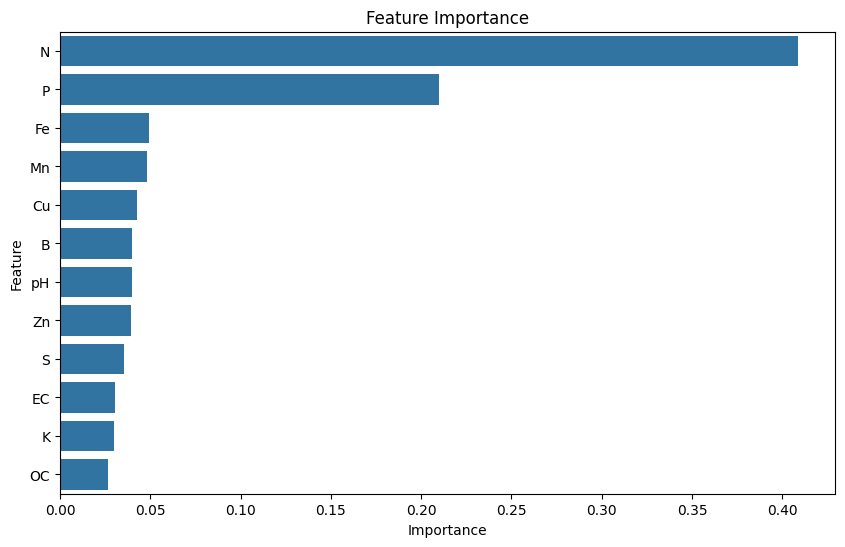

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Get feature importances
importances = best_rf_model.feature_importances_
feature_names = X.columns

# Create a DataFrame for visualization
feature_importances = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances)
plt.title('Feature Importance')
plt.show()


Confusion Matrix: Plot the confusion matrix to visualize the performance across different classes

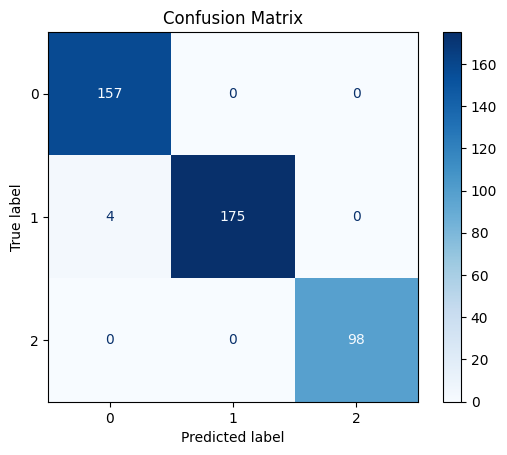

In [26]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred_best)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_rf_model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()


C:\Users\VALLURI KOMAL KRISHN\AppData\Local\Temp\ipykernel_2352\2196895946.py:23: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab10', n_classes)


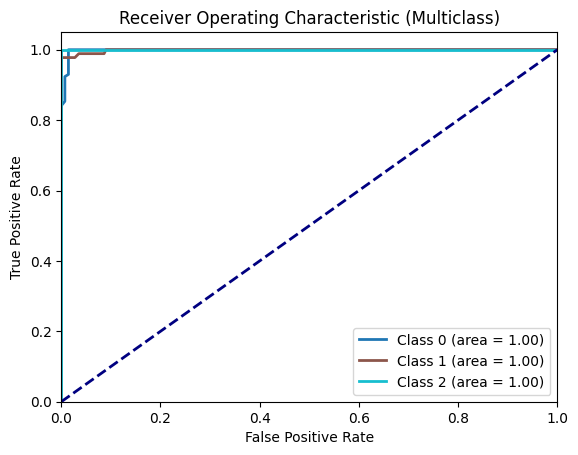

In [27]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Assuming best_rf_model and X_test are already defined

# Binarize the output
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
n_classes = y_test_bin.shape[1]

# Compute ROC curve and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], best_rf_model.predict_proba(X_test)[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves
plt.figure()
colors = plt.cm.get_cmap('tab10', n_classes)
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], color=colors(i), lw=2, label=f'Class {i} (area = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (Multiclass)')
plt.legend(loc='lower right')
plt.show()


In [28]:
import joblib

# Load the trained model
model = joblib.load('soil_fertility_rf_model.pkl')  # Ensure this path is correct

# Check feature names
print("Model Feature Names:", model.feature_names_in_)


Model Feature Names: ['N' 'P' 'K' 'pH' 'EC' 'OC' 'S' 'Zn' 'Fe' 'Cu' 'Mn' 'B']
